# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [3]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[1, 8, 5, 2, 0, 4, 9, 7, 3, 6]

In [4]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [5]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(4.981251323688029)

Tour length: 4.98


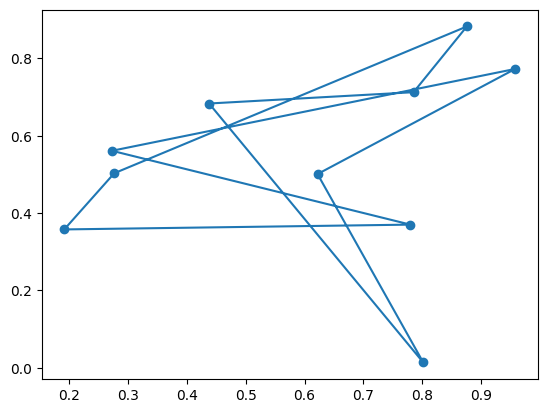

In [6]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [7]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [8]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


In addition: Warning message:
executing %dopar% sequentially: no parallel backend registered 


Tour length: 2.76


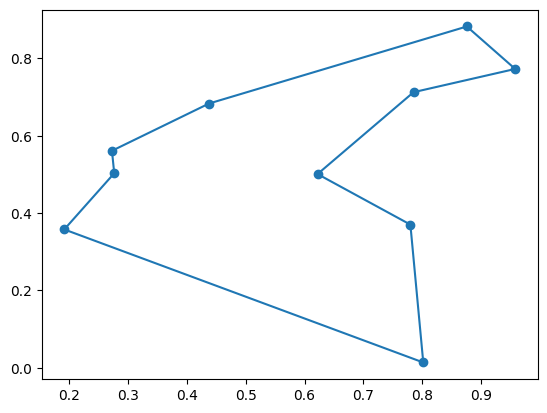

In [9]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [10]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr   min      lq     mean   median     uq     max neval
 tsp <- TSP(d) 328.1 341.549 362.3728 350.1065 362.36 801.209   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [11]:
tsp = random_tsp(20)

In [26]:
# Code goes here
# permutation tour
def move_swap(tour):
    new = tour.copy()
    a,b = np.random.randint(0,len(tour),2)
    new[a], new[b] = new[b], new[a]
    return new

def move_swap_neighbors(tour):
    new_tour = tour.copy()
    a = np.random.randint(0, len(tour)-1)
    if a > 0: b = a+1
    else: b = len(tour)-1
    new_tour[a] = tour[b]
    new_tour[b] = tour[a]
    return(new_tour)
def move_reverse(tour):
    new_tour = tour.copy()
    ab = np.random.randint(0, len(tour)+1, 2)
    ab.sort()
    new_tour[ab[0]:ab[1]] = new_tour[ab[0]:ab[1]][::-1]
    return(new_tour)


def generate_and_find_minimum_at_step(tsp,tour,method_swap =move_reverse , max_step =100, current_length = 0):
    current_tour = tour.copy()
    for i in range(max_step):
        print("step ",i)
        new_tour = method_swap(tour)
        new_length = tour_length(tsp,new_tour)
        if new_length < current_length:
            tour = new_tour
            current_tour = new_tour
            current_length = new_length
        print("length",current_length)
    return tour,current_length

epoch = 200

new_tour = random_tour(20)
current_length =  tour_length(tsp,new_tour)
for ep in range(0,epoch):
    new_tour,current_length = generate_and_find_minimum_at_step(tsp, new_tour, move_reverse, max_step=1000, current_length=current_length)

print(new_tour,current_length)

Streaming output truncated to the last 5000 lines.
length 3.936484273772405
step  501
length 3.936484273772405
step  502
length 3.936484273772405
step  503
length 3.936484273772405
step  504
length 3.936484273772405
step  505
length 3.936484273772405
step  506
length 3.936484273772405
step  507
length 3.936484273772405
step  508
length 3.936484273772405
step  509
length 3.936484273772405
step  510
length 3.936484273772405
step  511
length 3.936484273772405
step  512
length 3.936484273772405
step  513
length 3.936484273772405
step  514
length 3.936484273772405
step  515
length 3.936484273772405
step  516
length 3.936484273772405
step  517
length 3.936484273772405
step  518
length 3.936484273772405
step  519
length 3.936484273772405
step  520
length 3.936484273772405
step  521
length 3.936484273772405
step  522
length 3.936484273772405
step  523
length 3.936484273772405
step  524
length 3.936484273772405
step  525
length 3.936484273772405
step  526
length 3.936484273772405
step  527
leng

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

In [13]:
# Code goes here

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

In [14]:
# Code goes here

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

In [15]:
# Code goes here

## Simulated Annealing [2 Points]

In [16]:
# Code goes here

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [17]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 1.058340072631836 milliseconds


In [18]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [19]:
# Code goes here